In [17]:
import pandas as pd
import numpy as np
import cdt
import networkx as nx
import os

# Importing necessary libraries

In [18]:
data_dir = '/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e10_n10000_linear_struct'

## Test run

In [20]:
dag_path = os.path.join(data_dir, 'DAG1.npy')
cpdag_path = os.path.join(data_dir, 'CPDAG1.npy')
obs_data_path = os.path.join(data_dir, 'data1.npy')
interv_data_path = os.path.join(data_dir, 'data_interv1.npy')
regime_idx_path = os.path.join(data_dir, 'regime1.csv')
interv_nodes_path = os.path.join(data_dir, 'intervention1.csv')

In [25]:
dag = np.load(dag_path)
dag

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [26]:
cpdag = np.load(cpdag_path)
cpdag

array([[0., 1., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
obs_data = np.load(obs_data_path)
obs_data

array([[ 1.04549416,  1.56876855,  0.50505903, ..., -1.55214666,
        -0.67011774, -0.95467569],
       [ 0.83139287,  0.29945842, -0.56516481, ..., -0.82588713,
        -1.0324189 , -0.20330703],
       [-1.53261836, -2.29737887,  0.70926069, ...,  1.30303601,
         2.05855852,  0.90334801],
       ...,
       [-1.68027651, -1.29201461,  0.36296983, ...,  0.20386925,
         0.3136674 ,  1.03691721],
       [ 0.73037723,  0.7762301 ,  0.5579628 , ..., -0.08943212,
        -1.72667629, -0.31639158],
       [-2.34830366, -2.29520103, -0.47288351, ...,  1.47536252,
         1.07835087,  2.56914919]], shape=(10000, 10))

In [29]:
# Load data frame from csv regime_idx_path
regime_df = pd.read_csv(regime_idx_path)
regime_df

,10
0,10
1,10
2,10
3,10
4,10
...,...
9994,0
9995,0
9996,0
9997,0


In [30]:
# Load data frame from csv interv_nodes_path, but load even empty rows
# and fill them with NaN
# Use the dtype parameter to specify the data type for each column
interv_nodes_df = pd.read_csv(interv_nodes_path)
interv_nodes_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
9085,3
9086,3
9087,3
9088,3


In [31]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.utils.cit import fisherz
import numpy as np

In [34]:
cg = pc(obs_data)
GraphUtils.to_pydot(cg.G).write_png("pc_graph.png")

Depth=3, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 1096.49it/s]


In [40]:
def convert_cpdag_format(causal_graph):
    """
    Convert the CPDAG format from CausalGraph (cg.G.graph) to an adjacency matrix format.
    
    Args:
        causal_graph: A CausalGraph object with cg.G.graph as the adjacency matrix.
    
    Returns:
        A NumPy adjacency matrix where:
        - 1 represents an edge (directed or undirected).
        - 0 represents no edge.
    """
    # Extract the graph matrix
    graph_matrix = causal_graph.G.graph
    n = graph_matrix.shape[0]
    
    # Initialize the adjacency matrix
    adjacency_matrix = np.zeros((n, n), dtype=int)
    
    for i in range(n):
        for j in range(n):
            if graph_matrix[j, i] == 1 and graph_matrix[i, j] == -1:
                # Directed edge i -> j
                adjacency_matrix[i, j] = 1
            elif graph_matrix[i, j] == -1 and graph_matrix[j, i] == -1:
                # Undirected edge i -- j
                adjacency_matrix[i, j] = 1
                adjacency_matrix[j, i] = 1
            elif graph_matrix[i, j] == 1 and graph_matrix[j, i] == 1:
                # Bidirectional edge i <-> j
                adjacency_matrix[i, j] = 1
                adjacency_matrix[j, i] = 1
    
    return adjacency_matrix

In [38]:
cg.G.graph

array([[ 0, -1,  0,  0, -1,  0,  0,  0,  0, -1],
       [-1,  0,  0,  0, -1,  0,  0, -1, -1,  0],
       [ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [50]:
convert_cpdag_format(cg)

array([[0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
cpdag

numpy.ndarray

In [54]:
SHD = np.sum(convert_cpdag_format(cg) != cpdag)
print(SHD)

0


In [74]:
# Dictionary to store SHD values and statistics for each data directory
shd_stats_per_dir = {}

# List of data directories to iterate through
data_dirs = [
    os.path.join('/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect', d)
    for d in os.listdir('/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect')
    if os.path.isdir(os.path.join('/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect', d))
    and d != 'sachs_intervention' and not d.endswith('.zip')
]

# Iterate through each data directory
for data_dir in data_dirs:
    print(f"Processing data directory: {data_dir}")
    
    shd_values = []  # Reset SHD values for the current directory
    
    # Iterate through the 10 datasets in the current directory
    for i in range(1, 11):
        # Load the DAG, CPDAG, and observational data
        dag_path = os.path.join(data_dir, f'DAG{i}.npy')
        cpdag_path = os.path.join(data_dir, f'CPDAG{i}.npy')
        obs_data_path = os.path.join(data_dir, f'data{i}.npy')
        
        dag = np.load(dag_path)
        cpdag = np.load(cpdag_path)
        obs_data = np.load(obs_data_path)
        
        # Estimate the CPDAG using the PC algorithm
        cg = pc(obs_data)
        
        # Convert the estimated CPDAG to adjacency matrix format
        estimated_cpdag = convert_cpdag_format(cg)
        
        # Compute the SHD
        shd = np.sum(estimated_cpdag != cpdag)
        shd_values.append(shd)
        
        # Print the SHD for the current dataset
        print(f"Dataset {i}: SHD = {shd}")
    
    # Compute the mean and variance of SHD values for the current directory
    mean_shd = np.mean(shd_values)
    variance_shd = np.var(shd_values)
    
    # Store the full SHD values and statistics in the dictionary
    shd_stats_per_dir[data_dir] = {
        'shd_values': shd_values,
        'mean_shd': mean_shd,
        'variance_shd': variance_shd
    }
    
    print(f"Mean SHD for {data_dir}: {mean_shd}")
    print(f"Variance of SHD for {data_dir}: {variance_shd}")

# Display the SHD statistics for all directories
print("SHD Statistics per Data Directory:")
print(shd_stats_per_dir)


Processing data directory: /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e40_n10000_nnadd_struct


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 584.75it/s]


Dataset 1: SHD = 48


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 776.15it/s]


Dataset 2: SHD = 50


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 345.79it/s]


Dataset 3: SHD = 31


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 716.33it/s]


Dataset 4: SHD = 40


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 766.33it/s]


Dataset 5: SHD = 36


Depth=5, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 767.06it/s]


Dataset 6: SHD = 54


Depth=5, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 945.28it/s] 


Dataset 7: SHD = 60


Depth=5, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 864.64it/s] 


Dataset 8: SHD = 46


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 1003.49it/s]


Dataset 9: SHD = 44


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 783.15it/s]


Dataset 10: SHD = 50
Mean SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e40_n10000_nnadd_struct: 45.9
Variance of SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e40_n10000_nnadd_struct: 66.09
Processing data directory: /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e10_n10000_linear_struct


Depth=3, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 1070.69it/s]


Dataset 1: SHD = 0


Depth=2, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 225.22it/s]


Dataset 2: SHD = 9


Depth=2, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 943.49it/s] 


Dataset 3: SHD = 0


Depth=2, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 502.05it/s]


Dataset 4: SHD = 0


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 1006.29it/s]


Dataset 5: SHD = 0


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 917.55it/s] 


Dataset 6: SHD = 0


Depth=3, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 1151.17it/s]


Dataset 7: SHD = 0


Depth=3, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 893.05it/s] 


Dataset 8: SHD = 0


Depth=3, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 1046.90it/s]


Dataset 9: SHD = 0


Depth=2, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 988.92it/s] 


Dataset 10: SHD = 0
Mean SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e10_n10000_linear_struct: 0.9
Variance of SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e10_n10000_linear_struct: 7.290000000000001
Processing data directory: /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e80_n10000_nnadd_struct


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1037.00it/s]


Dataset 1: SHD = 94


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1003.51it/s]


Dataset 2: SHD = 98


Depth=4, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 733.80it/s] 


Dataset 3: SHD = 91


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1247.40it/s]


Dataset 4: SHD = 92


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 992.83it/s] 


Dataset 5: SHD = 66


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1073.92it/s]


Dataset 6: SHD = 101


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1179.65it/s]


Dataset 7: SHD = 98


Depth=4, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 738.30it/s]


Dataset 8: SHD = 79


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1174.37it/s]


Dataset 9: SHD = 91


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 980.62it/s] 


Dataset 10: SHD = 81
Mean SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e80_n10000_nnadd_struct: 89.1
Variance of SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e80_n10000_nnadd_struct: 104.09
Processing data directory: /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e20_n10000_linear_struct


Depth=4, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1204.72it/s]


Dataset 1: SHD = 5


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1222.63it/s]


Dataset 2: SHD = 4


Depth=2, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 979.03it/s] 


Dataset 3: SHD = 4


Depth=6, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1152.74it/s]


Dataset 4: SHD = 2


Depth=2, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 689.52it/s]


Dataset 5: SHD = 0


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1215.53it/s]


Dataset 6: SHD = 9


Depth=4, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 709.78it/s] 


Dataset 7: SHD = 0


Depth=3, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1061.00it/s]


Dataset 8: SHD = 2


Depth=3, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1134.48it/s]


Dataset 9: SHD = 2


Depth=4, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1173.79it/s]


Dataset 10: SHD = 11
Mean SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e20_n10000_linear_struct: 3.9
Variance of SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e20_n10000_linear_struct: 11.889999999999999
Processing data directory: /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e10_n10000_nnadd_struct


Depth=3, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 800.97it/s] 


Dataset 1: SHD = 7


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 1018.21it/s]


Dataset 2: SHD = 14


Depth=3, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 505.94it/s]


Dataset 3: SHD = 13


Depth=5, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 984.65it/s] 


Dataset 4: SHD = 6


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 878.17it/s] 

Dataset 5: SHD = 12



Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 919.26it/s] 


Dataset 6: SHD = 15


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 1040.00it/s]


Dataset 7: SHD = 0


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 608.65it/s]


Dataset 8: SHD = 27


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 836.85it/s] 


Dataset 9: SHD = 13


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 1006.00it/s]


Dataset 10: SHD = 8
Mean SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e10_n10000_nnadd_struct: 11.5
Variance of SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e10_n10000_nnadd_struct: 45.85
Processing data directory: /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e40_n10000_nn_struct


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 889.57it/s] 


Dataset 1: SHD = 44


Depth=5, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 894.40it/s] 


Dataset 2: SHD = 41


Depth=5, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 892.61it/s] 


Dataset 3: SHD = 60


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 946.48it/s] 


Dataset 4: SHD = 44


Depth=5, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 818.51it/s]


Dataset 5: SHD = 57


Depth=5, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 798.46it/s]


Dataset 6: SHD = 43


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 523.75it/s]


Dataset 7: SHD = 55


Depth=5, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 838.68it/s]


Dataset 8: SHD = 51


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 867.36it/s] 


Dataset 9: SHD = 67


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 556.83it/s]


Dataset 10: SHD = 57
Mean SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e40_n10000_nn_struct: 51.9
Variance of SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e40_n10000_nn_struct: 67.89
Processing data directory: /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e20_n10000_nn_struct


Depth=6, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1205.64it/s]


Dataset 1: SHD = 9


Depth=4, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 955.49it/s] 


Dataset 2: SHD = 27


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1142.19it/s]


Dataset 3: SHD = 19


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1166.02it/s]


Dataset 4: SHD = 16


Depth=4, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 876.26it/s] 


Dataset 5: SHD = 19


Depth=6, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1196.44it/s]


Dataset 6: SHD = 15


Depth=4, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 929.09it/s] 


Dataset 7: SHD = 24


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1008.63it/s]


Dataset 8: SHD = 17


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1166.53it/s]


Dataset 9: SHD = 9


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1237.81it/s]


Dataset 10: SHD = 13
Mean SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e20_n10000_nn_struct: 16.8
Variance of SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e20_n10000_nn_struct: 30.559999999999995
Processing data directory: /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e80_n10000_nn_struct


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1143.72it/s]


Dataset 1: SHD = 94


Depth=4, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 918.02it/s] 


Dataset 2: SHD = 89


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 988.71it/s] 


Dataset 3: SHD = 67


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1149.77it/s]


Dataset 4: SHD = 91


Depth=4, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 709.77it/s] 


Dataset 5: SHD = 111


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1039.61it/s]


Dataset 6: SHD = 81


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1020.54it/s]


Dataset 7: SHD = 84


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1168.66it/s]


Dataset 8: SHD = 105


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 990.94it/s] 


Dataset 9: SHD = 91


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1003.79it/s]


Dataset 10: SHD = 80
Mean SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e80_n10000_nn_struct: 89.3
Variance of SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e80_n10000_nn_struct: 142.61
Processing data directory: /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e40_n10000_linear_struct


Depth=5, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 534.74it/s]


Dataset 1: SHD = 40


Depth=5, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 941.29it/s] 


Dataset 2: SHD = 44


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 842.23it/s]


Dataset 3: SHD = 42


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 636.86it/s]


Dataset 4: SHD = 50


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 754.75it/s]


Dataset 5: SHD = 43


Depth=5, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 713.78it/s]


Dataset 6: SHD = 56


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 759.60it/s]


Dataset 7: SHD = 55


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 1012.65it/s]


Dataset 8: SHD = 43


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 828.05it/s]


Dataset 9: SHD = 43


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 575.15it/s]


Dataset 10: SHD = 38
Mean SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e40_n10000_linear_struct: 45.4
Variance of SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e40_n10000_linear_struct: 34.04
Processing data directory: /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e80_n10000_linear_struct


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1129.87it/s]


Dataset 1: SHD = 79


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1065.42it/s]


Dataset 2: SHD = 103


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1080.28it/s]


Dataset 3: SHD = 72


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1106.31it/s]


Dataset 4: SHD = 91


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1059.72it/s]


Dataset 5: SHD = 89


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1090.79it/s]


Dataset 6: SHD = 102


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1029.34it/s]


Dataset 7: SHD = 84


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1076.51it/s]


Dataset 8: SHD = 93


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1036.50it/s]


Dataset 9: SHD = 92


Depth=4, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 837.33it/s]


Dataset 10: SHD = 96
Mean SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e80_n10000_linear_struct: 90.1
Variance of SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e80_n10000_linear_struct: 84.48999999999998
Processing data directory: /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e20_n10000_nnadd_struct


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1180.26it/s]


Dataset 1: SHD = 21


Depth=6, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1102.39it/s]


Dataset 2: SHD = 38


Depth=4, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 703.00it/s]


Dataset 3: SHD = 31


Depth=4, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1200.17it/s]


Dataset 4: SHD = 20


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1113.29it/s]


Dataset 5: SHD = 29


Depth=3, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1151.22it/s]


Dataset 6: SHD = 14


Depth=6, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1120.00it/s]


Dataset 7: SHD = 35


Depth=5, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1079.43it/s]


Dataset 8: SHD = 31


Depth=6, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1312.07it/s]


Dataset 9: SHD = 32


Depth=3, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 1211.74it/s]


Dataset 10: SHD = 10
Mean SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e20_n10000_nnadd_struct: 26.1
Variance of SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e20_n10000_nnadd_struct: 78.09
Processing data directory: /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e10_n10000_nn_struct


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 1055.33it/s]


Dataset 1: SHD = 4


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 835.42it/s]


Dataset 2: SHD = 13


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 920.57it/s] 


Dataset 3: SHD = 8


Depth=5, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 952.51it/s] 


Dataset 4: SHD = 11


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 970.03it/s] 


Dataset 5: SHD = 2


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 896.12it/s] 


Dataset 6: SHD = 3


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 858.43it/s] 


Dataset 7: SHD = 16


Depth=3, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 987.78it/s] 


Dataset 8: SHD = 5


Depth=2, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 1128.71it/s]


Dataset 9: SHD = 1


Depth=4, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 1015.52it/s]


Dataset 10: SHD = 13
Mean SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e10_n10000_nn_struct: 7.6
Variance of SHD for /cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e10_n10000_nn_struct: 25.639999999999997
SHD Statistics per Data Directory:
{'/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e40_n10000_nnadd_struct': {'shd_values': [np.int64(48), np.int64(50), np.int64(31), np.int64(40), np.int64(36), np.int64(54), np.int64(60), np.int64(46), np.int64(44), np.int64(50)], 'mean_shd': np.float64(45.9), 'variance_shd': np.float64(66.09)}, '/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e10_n10000_linear_struct': {'shd_values': [np.int64(0), np.int64(9), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], 'mean_shd': np.float64(0.9), 'variance_shd': np.float64(7.290000000000001)}, '/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data

In [93]:
shd_stats_per_dir.keys()

dict_keys(['/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e40_n10000_nnadd_struct', '/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e10_n10000_linear_struct', '/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e80_n10000_nnadd_struct', '/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e20_n10000_linear_struct', '/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e10_n10000_nnadd_struct', '/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e40_n10000_nn_struct', '/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e20_n10000_nn_struct', '/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e80_n10000_nn_struct', '/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p10_e40_n10000_linear_struct', '/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/data_p20_e80_n10000_linear_struct', '/cim/ehoney/ift6168_project_v2/if

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


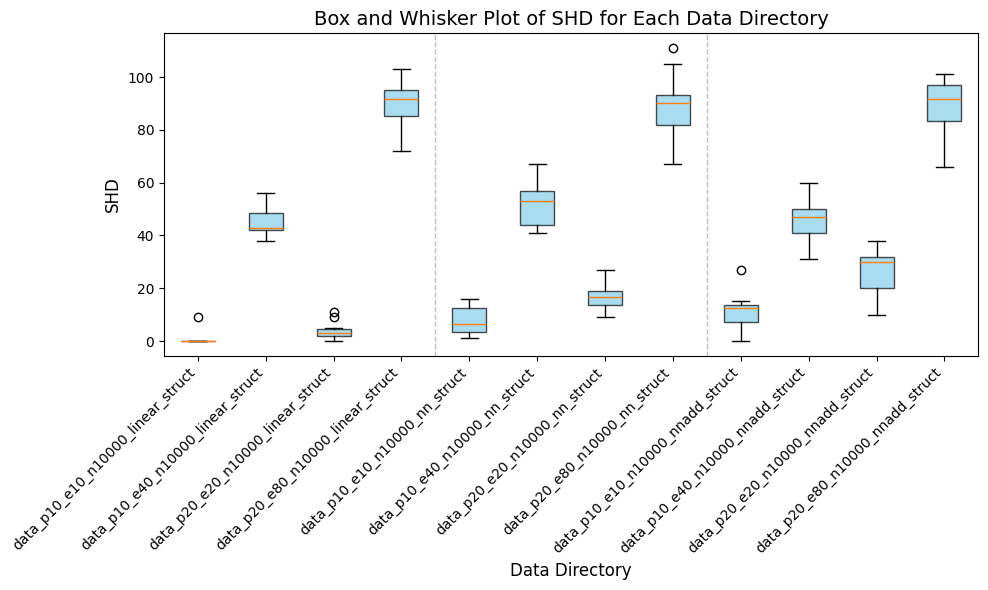

In [98]:
import matplotlib.pyplot as plt

# Prepare data for plotting
data_dirs = []
for struct_type in ['linear_struct', 'nn_struct', 'nnadd_struct']:
    for params in ['p10_e10', 'p10_e40', 'p20_e20', 'p20_e80']:
        dir_name = os.path.join('/cim/ehoney/ift6168_project_v2/ift6168_project/data/perfect/', f'data_{params}_n10000_{struct_type}')
        data_dirs.append(dir_name)
short_data_dirs = [os.path.basename(dir) for dir in data_dirs]  # Extract key info from paths
shd_values_per_dir = [shd_stats_per_dir[dir]['shd_values'] for dir in data_dirs]  # Use SHD values for boxplot

# Calculate group boundaries
group_boundaries = [i * 4 for i in range(1, len(['linear_struct', 'nn_struct', 'nnadd_struct']))]

# Create the plot
plt.figure(figsize=(10, 6))
plt.boxplot(shd_values_per_dir, labels=short_data_dirs, patch_artist=True, boxprops=dict(facecolor='skyblue', alpha=0.7))

# Add vertical lines between groups
for boundary in group_boundaries:
    plt.axvline(x=boundary + 0.5, color='grey', linestyle='--', linewidth=1, alpha=0.5)

plt.xlabel('Data Directory', fontsize=12)
plt.ylabel('SHD', fontsize=12)
plt.title('Box and Whisker Plot of SHD for Each Data Directory', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()